In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from src.processing import process_text

In [2]:
MODEL_PATH = "../models/logreg_tfidf_v_0_1_1.joblib"

In [3]:
df = pd.read_csv("../data/dataset.csv")

In [4]:
df.head()

,text,category
0,волшебный фото виктория поплавский евгениямедв...,winter_sport
1,возвращение подземелье треш эйфория тупость жа...,extreme
2,хороший чешский вратарь доминик доминатор гаше...,football
3,rtokenoid warhammerk валрак решить подкормить ...,boardgames
4,шестёркин затаскивать рейнджерс финал восточны...,hockey


In [5]:
df.isna().sum()

text        0
category    0
dtype: int64

In [7]:
X = df.text
y = df.category

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [9]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("logreg", LogisticRegression(
        C=5.0,                          # сила регуляризации (меньшие значения определяют более сильную регуляризацию)
        max_iter=500,                   # максимальное значение итераций для сходимости решателя
        solver="lbfgs",                 # решатель: алгоритм оптимизации подгонки модели
        class_weight="balanced",        # автоматическая балансировка классов
    ))  
])

In [10]:
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('logreg',
                 LogisticRegression(C=5.0, class_weight='balanced',
                                    max_iter=500))])

In [11]:
y_pred = model.predict(X_test)

In [12]:
report = classification_report(y_test, y_pred)

In [13]:
print(report)

              precision    recall  f1-score   support

   athletics       0.93      0.88      0.91       594
   autosport       0.91      0.88      0.89       632
  basketball       0.94      0.89      0.92       570
  boardgames       0.94      0.96      0.95       604
      esport       0.80      0.84      0.82       598
     extreme       0.70      0.83      0.76       622
    football       0.84      0.81      0.83       572
      hockey       0.91      0.86      0.88       590
martial_arts       0.80      0.81      0.80       610
   motosport       0.91      0.89      0.90       606
      tennis       0.98      0.94      0.96       600
  volleyball       0.93      0.88      0.90       590
winter_sport       0.86      0.90      0.88       560

    accuracy                           0.88      7748
   macro avg       0.88      0.88      0.88      7748
weighted avg       0.88      0.88      0.88      7748



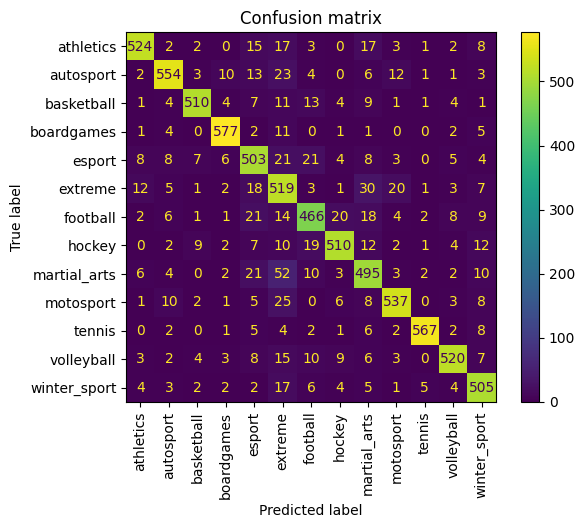

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion matrix", fontdict={"fontsize": 12})
plt.xticks(rotation=90);

In [15]:
joblib.dump(model, MODEL_PATH)

['../models/logreg_tfidf_v_0_1_1.joblib']